# Plot branches test results 

After generating the output tsv file from running `enumerate-mtuations-on-host-switch-branches`, analyze the results here.

In [1]:
import glob
import re,copy, imp
import pandas as pd 
import numpy as np

# for this to work, you will need to download the most recent version of baltic, available here 
bt = imp.load_source('baltic', '../baltic/baltic/baltic.py')

from Bio import SeqIO
from io import StringIO
import time

import rpy2
%load_ext rpy2.ipython

In [2]:
from datetime import date
current_date = str(date.today())

In [3]:
# define colors 
domestic_color="#4E83AE"
wild_color="#CEB540"
human_color="#DE4428"

In [4]:
# read in results as a dataframe
mutations_df = pd.read_csv("../data/aa-mutations-on-branches-2022-06-08.tsv", sep="\t")

In [5]:
number_trees = len(set(mutations_df['tree_number'].tolist()))
print(number_trees)

1133


In [6]:
mutations_df[mutations_df["aa_muts"] == "A150V"]

,Unnamed: 0,tree_number,branch_number,type,host_switch,host,role,mutations,aa_muts,branch_id
894,516,1,517,domestic-to-human,yes,human,child,"['T42C', 'T59A', 'C470T', 'G554A', 'C1161T']",A150V,<baltic.leaf object at 0x7f853c9e6780>
900,521,1,522,domestic-to-human,yes,domestic,parent,"['C470T', 'A776G']",A150V,<baltic.node object at 0x7f853c9e68d0>
1084,601,1,602,domestic-to-human,yes,domestic,parent,"['G348A', 'C470T']",A150V,<baltic.node object at 0x7f853c9d2908>
1195,661,1,662,domestic-to-human,yes,domestic,parent,"['G291A', 'G372A', 'C379T', 'C438A', 'C470T', ...",A150V,<baltic.node object at 0x7f850f307e80>
2011,1186,1,1187,domestic-to-human,yes,domestic,parent,"['C470T', 'A543G', 'C792T', 'A1040T', 'T1467C'...",A150V,<baltic.node object at 0x7f84b6b0fc18>
3325,1901,2,505,wild-to-domestic,yes,domestic,child,"['T42C', 'T59A', 'A203G', 'C279T', 'C470T', 'G...",A150V,<baltic.node object at 0x7f84b6d57d68>
3329,1902,2,506,domestic-to-human,yes,domestic,parent,"['T42C', 'T59A', 'A203G', 'C279T', 'C470T', 'G...",A150V,<baltic.node object at 0x7f84b6d57d68>
3338,1909,2,513,domestic-to-human,yes,domestic,parent,"['C470T', 'A616G', 'A776G']",A150V,<baltic.node object at 0x7f84b6d600f0>
3532,1997,2,601,domestic-to-human,yes,human,child,"['C470T', 'T738C']",A150V,<baltic.leaf object at 0x7f84b6d72438>
3562,2018,2,622,domestic-to-human,yes,human,child,"['G372A', 'C379T', 'C438A', 'C470T', 'G600A', ...",A150V,<baltic.leaf object at 0x7f84b6d72d30>


In [7]:
mutations_df.head()

,Unnamed: 0,tree_number,branch_number,type,host_switch,host,role,mutations,aa_muts,branch_id
0,0,1,1,within-wild,no,wild,on,"['C72T', 'G173A', 'T392C', 'A856G', 'C1171A', ...",R51K,<baltic.node object at 0x7f86187a5278>
1,0,1,1,within-wild,no,wild,on,"['C72T', 'G173A', 'T392C', 'A856G', 'C1171A', ...",I124T,<baltic.node object at 0x7f86187a5278>
2,0,1,1,within-wild,no,wild,on,"['C72T', 'G173A', 'T392C', 'A856G', 'C1171A', ...",T279A,<baltic.node object at 0x7f86187a5278>
3,0,1,1,within-wild,no,wild,on,"['C72T', 'G173A', 'T392C', 'A856G', 'C1171A', ...",Q384K,<baltic.node object at 0x7f86187a5278>
4,1,1,2,within-wild,no,wild,on,"['A9C', 'C957T']",NaN,<baltic.node object at 0x7f86187a52b0>


In [14]:
"""count the total number of branches that are host switch branches vs. within-host branches"""

total_branches = len(set(mutations_df['branch_id'].tolist()))
print("total branches: ", len(set(mutations_df['branch_id'].tolist())))

total_host_switch_branches = len(set(mutations_df[mutations_df["host_switch"] == "yes"]["branch_id"].tolist()))
total_non_branches = len(set(mutations_df[mutations_df["host_switch"] == "no"]["branch_id"].tolist()))

print("total number of host switch and non host switch branches:")
print(total_host_switch_branches, total_non_branches)
expected_host_switch = total_host_switch_branches/(total_non_branches + total_host_switch_branches)
expected_non = total_non_branches/(total_non_branches + total_host_switch_branches)

print("proportion of unique branches that are host switch vs. not host switch:")
print(expected_host_switch, expected_non)

total branches:  1565923
total number of host switch and non host switch branches:
623239 942684
proportion of unique branches that are host switch vs. not host switch:
0.3980010511372526 0.6019989488627474


In [15]:
wild_domestic = len(set(mutations_df[mutations_df["type"] == "wild-to-domestic"]["branch_id"].tolist()))
within_wild = len(set(mutations_df[mutations_df["type"] == "within-wild"]["branch_id"].tolist()))
domestic_wild = len(set(mutations_df[mutations_df["type"] == "domestic-to-wild"]["branch_id"].tolist()))
domestic_human = len(set(mutations_df[mutations_df["type"] == "domestic-to-human"]["branch_id"].tolist()))
within_domestic = len(set(mutations_df[mutations_df["type"] == "within-domestic"]["branch_id"].tolist()))
within_human = len(set(mutations_df[mutations_df["type"] == "within-human"]["branch_id"].tolist()))

print("wild to domestic branches: ", wild_domestic)
print("within wild branches: ", within_wild)
print("domestic to wild branches: ", domestic_wild)
print("domestic to human branches: ", domestic_human)
print("within domestic: ", within_domestic)
print("within human: ", within_human)

wild to domestic branches:  333134
within wild branches:  316156
domestic to wild branches:  65160
domestic to human branches:  247122
within domestic:  593294
within human:  33234


In [16]:
"""across the posterior, which mutations are found on domestic to human branches at a rate higher than the
expectation based on the frequency of those branches? For example, if 1 in 5 branches is a domestic to human 
branch, but we have a mutation whose presence is 80% on domestic to human branches, that would be enriched. I'm 
not sure what the cutoff for significance should be"""

def convert_to_counts_dict(input_df, mutation_column):
    
    output_dict = {}
    
    # make a list of every unique mutation in the dataframe
    muts_to_query = set(input_df[mutation_column].tolist())
    muts_to_query = [x for x in muts_to_query if str(x) != '']
    
    # for each mutation, use value counts to get the number of rows with that mutation and each branch type
    for m in muts_to_query:
        output_dict[m] = {}
        local_df = input_df[input_df[mutation_column] == m]
        value_counts = local_df['type'].value_counts()

        for i in range(len(value_counts)):
            count = value_counts[i]
            index = value_counts.index.tolist()[i]
            
            if index in output_dict[m]:
                output_dict[m][index]+=1
            else:
                output_dict[m][index] = count
                
    return(output_dict)

In [17]:
# test_df = pd.read_csv("../data/TEST-mutations-on-branches-2022-05-12.tsv", sep="\t")
# test_dict = convert_to_counts_dict(test_df, "mutations")
# print(test_dict)

In [18]:
mutations_dict = convert_to_counts_dict(mutations_df, "aa_muts")

In [19]:
df = pd.DataFrame.from_dict(mutations_dict, orient='index')
df.fillna(0, inplace=True)
df.head()

,domestic-to-wild,within-domestic,wild-to-domestic,within-wild,within-human,domestic-to-human,wild-to-human
E340K,1.0,0.0,0.0,0.0,0.0,0.0,0.0
T205K,4.0,792.0,231.0,6.0,0.0,0.0,0.0
V328F,11.0,0.0,11.0,0.0,597.0,523.0,1.0
T156A,926.0,111.0,79.0,108.0,0.0,0.0,0.0
R473G,22.0,1088.0,30.0,0.0,0.0,0.0,0.0


In [20]:
# write out to tsv
df.to_csv("/Users/lmoncla/src/h5n1-gwas/data/aa-mutations-counts-on-branches-by-type-"+current_date+".tsv", sep="\t")

In [21]:
df = pd.read_csv("/Users/lmoncla/src/h5n1-gwas/data/aa-mutations-counts-on-branches-by-type-2022-06-08.tsv", sep="\t")

In [22]:
# sum the total counts with .sum(axis=1)
df['total_counts'] = df.sum(axis=1)
df.head()

,Unnamed: 0,domestic-to-wild,within-domestic,wild-to-domestic,within-wild,within-human,domestic-to-human,wild-to-human,total_counts
0,E340K,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,T205K,4.0,792.0,231.0,6.0,0.0,0.0,0.0,1033.0
2,V328F,11.0,0.0,11.0,0.0,597.0,523.0,1.0,1143.0
3,T156A,926.0,111.0,79.0,108.0,0.0,0.0,0.0,1224.0
4,R473G,22.0,1088.0,30.0,0.0,0.0,0.0,0.0,1140.0


In [23]:
"""calculate the proportion of detections that are in domestic to human"""
df['prop_to_human'] = (df['domestic-to-human']+df['within-human'])/df['total_counts']
df['prop_to_domestic'] = (df['wild-to-domestic']+df['within-domestic'])/df['total_counts']
df['prop_to_wild'] = (df['domestic-to-wild']+df['within-wild'])/df['total_counts']

df.head()

,Unnamed: 0,domestic-to-wild,within-domestic,wild-to-domestic,within-wild,within-human,domestic-to-human,wild-to-human,total_counts,prop_to_human,prop_to_domestic,prop_to_wild
0,E340K,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,1.000000
1,T205K,4.0,792.0,231.0,6.0,0.0,0.0,0.0,1033.0,0.000000,0.990319,0.009681
2,V328F,11.0,0.0,11.0,0.0,597.0,523.0,1.0,1143.0,0.979878,0.009624,0.009624
3,T156A,926.0,111.0,79.0,108.0,0.0,0.0,0.0,1224.0,0.000000,0.155229,0.844771
4,R473G,22.0,1088.0,30.0,0.0,0.0,0.0,0.0,1140.0,0.000000,0.980702,0.019298


In [24]:
def determine_significance(input_df):
    
    from scipy.stats import fisher_exact
    output_df = input_df.copy()
        
    p_values = []
    
    # compare counts in domestic to human vs. total counts to number of branches that are domestic to human vs. total 
    # number of branches 
    for i in range(len(input_df)):
        table = [[(input_df['domestic-to-human'].values[i] + input_df['within-human'].values[i]),input_df['total_counts'].values[i]],[(within_human+domestic_human),total_branches]]
        OR, p = fisher_exact(table, alternative='two-sided')
        p_values.append(p)
#         if p < 0.05/total_number_mutations: 
#             print(p, row)
    
    output_df["p_values_to_human"] = p_values
    return(output_df)

In [25]:
total_number_mutations = len(df)
print(total_number_mutations)

1352


In [26]:
#test_df = df.head(100)

sig_df = determine_significance(df)
sig_df.head()

,Unnamed: 0,domestic-to-wild,within-domestic,wild-to-domestic,within-wild,within-human,domestic-to-human,wild-to-human,total_counts,prop_to_human,prop_to_domestic,prop_to_wild,p_values_to_human
0,E340K,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,1.000000,1.000000e+00
1,T205K,4.0,792.0,231.0,6.0,0.0,0.0,0.0,1033.0,0.000000,0.990319,0.009681,3.197705e-74
2,V328F,11.0,0.0,11.0,0.0,597.0,523.0,1.0,1143.0,0.979878,0.009624,0.009624,2.944779e-319
3,T156A,926.0,111.0,79.0,108.0,0.0,0.0,0.0,1224.0,0.000000,0.155229,0.844771,7.105492e-88
4,R473G,22.0,1088.0,30.0,0.0,0.0,0.0,0.0,1140.0,0.000000,0.980702,0.019298,5.140653e-82


In [27]:
# write out to tsv
sig_df.to_csv("/Users/lmoncla/src/h5n1-gwas/data/aa-mutations-branches-test-pvalues-"+current_date+".tsv", sep="\t")

In [28]:
sig_df2 = pd.read_csv("/Users/lmoncla/src/h5n1-gwas/data/aa-mutations-branches-test-pvalues-2022-06-08.tsv", sep="\t")

In [29]:
sig_df2.rename(columns={"Unnamed: 0.1": "aa_mut"}, inplace=True)
sig_df2['site'] = sig_df2['aa_mut'].str[1:-1]
sig_df2['site'] = pd.to_numeric(sig_df2['site'])
sig_df2.head()

,Unnamed: 0,aa_mut,domestic-to-wild,within-domestic,wild-to-domestic,within-wild,within-human,domestic-to-human,wild-to-human,total_counts,prop_to_human,prop_to_domestic,prop_to_wild,p_values_to_human,site
0,0,E340K,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,1.000000,1.000000e+00,340
1,1,T205K,4.0,792.0,231.0,6.0,0.0,0.0,0.0,1033.0,0.000000,0.990319,0.009681,3.197705e-74,205
2,2,V328F,11.0,0.0,11.0,0.0,597.0,523.0,1.0,1143.0,0.979878,0.009624,0.009624,2.944779e-319,328
3,3,T156A,926.0,111.0,79.0,108.0,0.0,0.0,0.0,1224.0,0.000000,0.155229,0.844771,7.105492e-88,156
4,4,R473G,22.0,1088.0,30.0,0.0,0.0,0.0,0.0,1140.0,0.000000,0.980702,0.019298,5.140653e-82,473


In [30]:
#sloth = sig_df2[sig_df2['Unnamed: 0.1'] == 'C470T']  # this is HA A150V
sloth = sig_df2[sig_df2['aa_mut'] == 'A150V']  # this is HA A150V

sloth

,Unnamed: 0,aa_mut,domestic-to-wild,within-domestic,wild-to-domestic,within-wild,within-human,domestic-to-human,wild-to-human,total_counts,prop_to_human,prop_to_domestic,prop_to_wild,p_values_to_human,site
382,382,A150V,8.0,3.0,803.0,0.0,902.0,4291.0,101.0,6108.0,0.850196,0.131958,0.00131,0.0,150


In [31]:
#sloth = sig_df2[sig_df2['Unnamed: 0.1'] == 'A350G']  # this is HA N110S; this should have many counts of within-human
sloth = sig_df2[sig_df2['aa_mut'] == 'N110S'] 
sloth

,Unnamed: 0,aa_mut,domestic-to-wild,within-domestic,wild-to-domestic,within-wild,within-human,domestic-to-human,wild-to-human,total_counts,prop_to_human,prop_to_domestic,prop_to_wild,p_values_to_human,site
242,242,N110S,27.0,3259.0,1894.0,41.0,0.0,509.0,9.0,5739.0,0.088691,0.897892,0.011849,1.086589e-62,110


In [33]:
# pull out those mutations that are significant and also are enriched, rather than depleted
significant_muts = sig_df2[(sig_df2['p_values_to_human'] < (0.05/total_number_mutations)) & (sig_df2['prop_to_human'] > (domestic_human+within_human)/total_branches)]

# may also want to have a minimum total count; here, I'm just setting to >2*number of trees to get muts that occurred
# on average, at least twice per tree
significant_muts = significant_muts[significant_muts['total_counts'] > number_trees*2]

print(len(significant_muts))
significant_muts

73


,Unnamed: 0,aa_mut,domestic-to-wild,within-domestic,wild-to-domestic,within-wild,within-human,domestic-to-human,wild-to-human,total_counts,prop_to_human,prop_to_domestic,prop_to_wild,p_values_to_human,site
8,8,L225S,31.0,1073.0,62.0,0.0,0.0,1123.0,2.0,2291.0,0.490179,0.495417,0.013531,7.810546e-146,225
41,41,N156K,78.0,1590.0,296.0,391.0,0.0,1010.0,11.0,3376.0,0.299171,0.558649,0.138922,3.195861e-42,156
57,57,I167V,800.0,1.0,24.0,327.0,40.0,1085.0,3.0,2280.0,0.493421,0.010965,0.494298,1.012729e-147,167
59,59,T211A,299.0,699.0,455.0,2.0,486.0,640.0,1.0,2582.0,0.436096,0.446940,0.116576,1.056943e-119,211
68,68,T529A,19.0,881.0,271.0,1.0,480.0,634.0,5.0,2291.0,0.486251,0.502837,0.008730,5.885044e-143,529
71,71,E284G,157.0,4.0,1179.0,0.0,4.0,1093.0,0.0,2437.0,0.450144,0.485433,0.064423,1.601426e-123,284
74,74,D474N,26.0,1089.0,44.0,0.0,456.0,662.0,5.0,2282.0,0.489921,0.496494,0.011394,4.940511e-145,474
95,95,R326K,62.0,1360.0,303.0,670.0,432.0,657.0,16.0,3500.0,0.311143,0.475143,0.209143,1.432268e-51,326
99,99,N260K,23.0,1080.0,45.0,0.0,452.0,676.0,2.0,2278.0,0.495171,0.493854,0.010097,6.869287e-149,260
103,103,M495I,66.0,1547.0,1204.0,625.0,1242.0,1008.0,3.0,5695.0,0.395083,0.483055,0.121335,2.935009e-194,495


In [34]:
#significant_muts[(significant_muts['prop_to_human'] < 0.5) & (significant_muts['prop_to_human'] > 0.4)]

## Plot mutation scores

I'd like to first just plot an overview of the overall proportion of times detected on to-human branches for all mutations. Then, it'd be nice to plot out the proportions for all thee types of mutations on all branch types. 

In [35]:
expected_prop_to_human = (domestic_human+within_human)/total_branches
expected_prop_to_domestic = (wild_domestic+within_domestic)/total_branches
expected_prop_to_wild = (domestic_wild+within_wild)/total_branches

In [36]:
expected_prop_to_human

0.1790356230798066

/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

  warnings.warn(x, RRuntimeWarning)


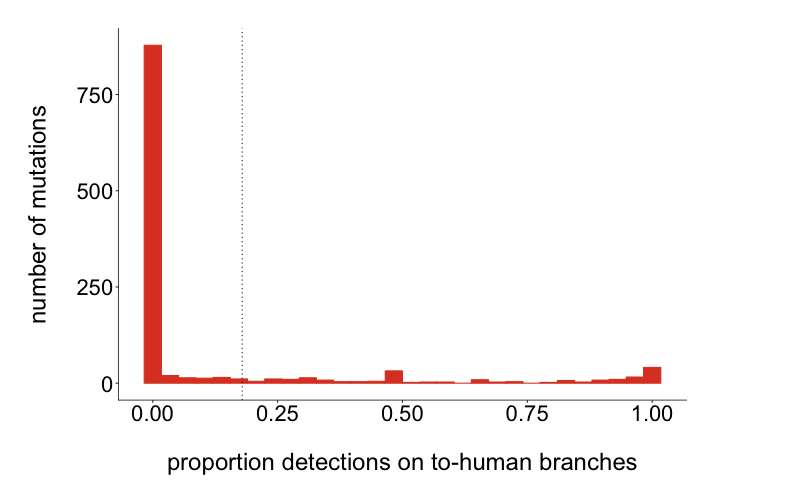

In [256]:
%%R -w 800 -h 500 -u px -i sig_df2,expected_prop_to_human,current_date,human_color,wild_color,domestic_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)

output_filename = paste("HA-aa-mutations-scores-branches-test-to-human-",current_date,".pdf", sep="")

p <- ggplot(data=sig_df2, aes(x=prop_to_human)) + 
    geom_histogram(color=human_color, fill=human_color)+
    geom_vline(aes(xintercept=expected_prop_to_human), linetype=3)+
    #geom_line(stat="count")+
    labs(x="\nproportion detections on to-human branches", y="number of mutations\n")+
    #scale_color_manual(values=c(domestic_to_human=human_color,wild_to_domestic=wild_color,domestic_to_wild=domestic_color,wild_to_human="grey50"))+
    #scale_y_continuous(breaks=seq(0,0.2,0.05), limits=c(0,0.2))+
    #scale_x_continuous(breaks=seq(1,12,1))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 7, height = 5, device = "pdf", path = "../figures", dpi = 300)
p

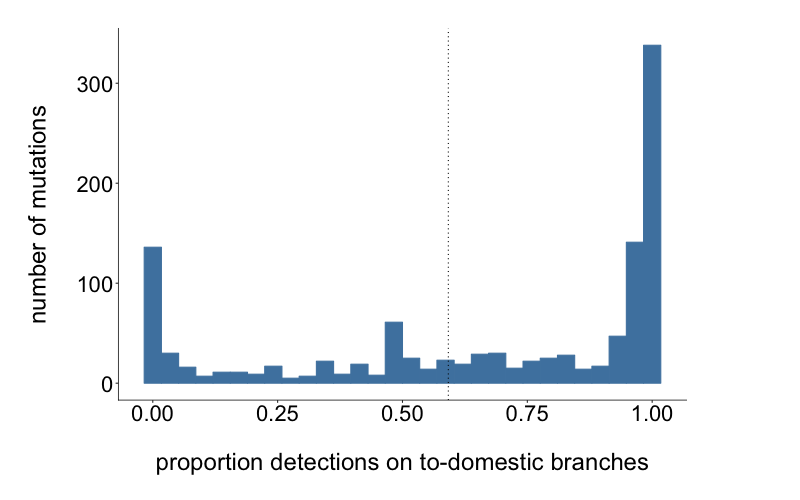

In [257]:
%%R -w 800 -h 500 -u px -i sig_df2,expected_prop_to_domestic,current_date,human_color,wild_color,domestic_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)

output_filename = paste("HA-aa-mutations-scores-branches-test-to-domestic-",current_date,".pdf", sep="")

p <- ggplot(data=sig_df2, aes(x=prop_to_domestic)) + 
    geom_histogram(color=domestic_color, fill=domestic_color)+
    geom_vline(aes(xintercept=expected_prop_to_domestic), linetype=3)+
    #geom_line(stat="count")+
    labs(x="\nproportion detections on to-domestic branches", y="number of mutations\n")+
    #scale_color_manual(values=c(domestic_to_human=human_color,wild_to_domestic=wild_color,domestic_to_wild=domestic_color,wild_to_human="grey50"))+
    #scale_y_continuous(breaks=seq(0,0.2,0.05), limits=c(0,0.2))+
    #scale_x_continuous(breaks=seq(1,12,1))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 7, height = 5, device = "pdf", path = "../figures", dpi = 300)
p

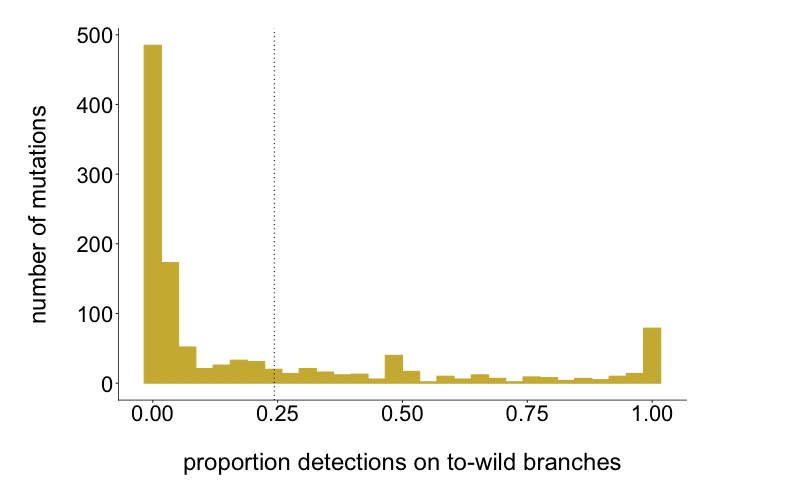

In [258]:
%%R -w 800 -h 500 -u px -i sig_df2,expected_prop_to_wild,current_date,human_color,wild_color,domestic_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)

output_filename = paste("HA-aa-mutations-scores-branches-test-to-wild-",current_date,".pdf", sep="")

p <- ggplot(data=sig_df2, aes(x=prop_to_wild)) + 
    geom_histogram(color=wild_color, fill=wild_color)+
    geom_vline(aes(xintercept=expected_prop_to_wild), linetype=3)+
    #geom_line(stat="count")+
    labs(x="\nproportion detections on to-wild branches", y="number of mutations\n")+
    #scale_color_manual(values=c(domestic_to_human=human_color,wild_to_domestic=wild_color,domestic_to_wild=domestic_color,wild_to_human="grey50"))+
    #scale_y_continuous(breaks=seq(0,0.2,0.05), limits=c(0,0.2))+
    #scale_x_continuous(breaks=seq(1,12,1))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 7, height = 5, device = "pdf", path = "../figures", dpi = 300)
p

## Plot significant mutations

In [37]:
sig_df2.head()

,Unnamed: 0,aa_mut,domestic-to-wild,within-domestic,wild-to-domestic,within-wild,within-human,domestic-to-human,wild-to-human,total_counts,prop_to_human,prop_to_domestic,prop_to_wild,p_values_to_human,site
0,0,E340K,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,1.000000,1.000000e+00,340
1,1,T205K,4.0,792.0,231.0,6.0,0.0,0.0,0.0,1033.0,0.000000,0.990319,0.009681,3.197705e-74,205
2,2,V328F,11.0,0.0,11.0,0.0,597.0,523.0,1.0,1143.0,0.979878,0.009624,0.009624,2.944779e-319,328
3,3,T156A,926.0,111.0,79.0,108.0,0.0,0.0,0.0,1224.0,0.000000,0.155229,0.844771,7.105492e-88,156
4,4,R473G,22.0,1088.0,30.0,0.0,0.0,0.0,0.0,1140.0,0.000000,0.980702,0.019298,5.140653e-82,473


In [38]:
sig_df2.rename(columns={"Unnamed: 0.1": "aa_mut"}, inplace=True)
sig_df2['site'] = sig_df2['aa_mut'].str[1:-1]
sig_df2['site'] = pd.to_numeric(sig_df2['site'])
sig_df2.head()

,Unnamed: 0,aa_mut,domestic-to-wild,within-domestic,wild-to-domestic,within-wild,within-human,domestic-to-human,wild-to-human,total_counts,prop_to_human,prop_to_domestic,prop_to_wild,p_values_to_human,site
0,0,E340K,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,1.000000,1.000000e+00,340
1,1,T205K,4.0,792.0,231.0,6.0,0.0,0.0,0.0,1033.0,0.000000,0.990319,0.009681,3.197705e-74,205
2,2,V328F,11.0,0.0,11.0,0.0,597.0,523.0,1.0,1143.0,0.979878,0.009624,0.009624,2.944779e-319,328
3,3,T156A,926.0,111.0,79.0,108.0,0.0,0.0,0.0,1224.0,0.000000,0.155229,0.844771,7.105492e-88,156
4,4,R473G,22.0,1088.0,30.0,0.0,0.0,0.0,0.0,1140.0,0.000000,0.980702,0.019298,5.140653e-82,473


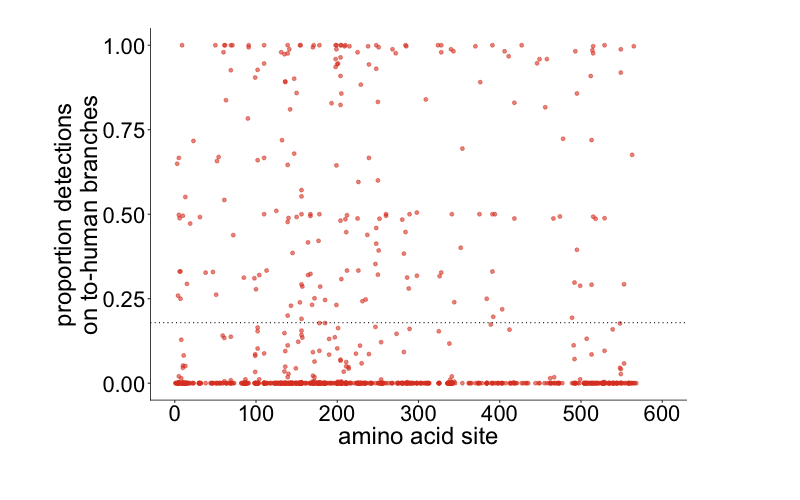

In [261]:
%%R -w 800 -h 500 -u px -i sig_df2,expected_prop_to_human,current_date,human_color,wild_color,domestic_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)

output_filename = paste("HA-aa-sig-mutations-scores-branches-test-to-human-",current_date,".pdf", sep="")

p <- ggplot(data=sig_df2, aes(y=prop_to_human, x=site)) + 
    geom_point(color=human_color, fill=human_color, alpha=0.6)+
    geom_hline(aes(yintercept=expected_prop_to_human), linetype=3)+
    #geom_line(stat="count")+
    labs(y="\nproportion detections\non to-human branches", x="amino acid site\n")+
    #scale_color_manual(values=c(domestic_to_human=human_color,wild_to_domestic=wild_color,domestic_to_wild=domestic_color,wild_to_human="grey50"))+
    #scale_y_continuous(breaks=seq(0,0.2,0.05), limits=c(0,0.2))+
    scale_x_continuous(breaks=seq(0,600,100), limits=c(0,600))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 7, height = 5, device = "pdf", path = "../figures", dpi = 300)
p

## Compare to known sites on HA 


These are sites pulled from the influenza research database for the H5N1 Cambodia projectt

In [39]:
known_sites = "/Users/lmoncla/src/h5n1-cambodia/data/IRD-functional-SNVs-data/HA-known-functional-alteration-sites.tsv"

In [40]:
# write a little function to remove all of the HA1 and HA2 annotations in parantheses 
# using iterative grep 

def remove_HA_annotation(amino_acid_position):
    amino_acid_position = amino_acid_position.replace("\"","")
    amino_acid_position = amino_acid_position.replace("\"","")
    
    searchstr = '(\\([A-z0-9\ ]+\\))'
    for match in re.finditer(searchstr,amino_acid_position):
        amino_acid_position = amino_acid_position.replace(match.groups()[0],"")
        
    return(amino_acid_position)

In [41]:
annotations = {}

with open(known_sites, "r") as infile: 
    for line in infile: 
        sites_to_add = []
        feature = line.split("\t")[1]
        category = line.split("\t")[4]
        amino_acid_position = line.split("\t")[5]
        PMID = line.split("\t")[6]
        comments = line.split("\t")[7].strip()
                    
        # filter out the HA1 annotation in () from the amino acid position
        amino_acid_position = remove_HA_annotation(amino_acid_position)
        
        # if the feature provides a range of amino acid positions with ... and commas
        if ".." in amino_acid_position and "," in amino_acid_position:
            for n in amino_acid_position.split(","):
                if ".." in n:
                    start = n.split("..")[0]
                    stop = n.split("..")[1]
                    for i in range(int(start), int(stop)+1):
                        sites_to_add.append(int(i))
                else:
                    sites_to_add.append(n)

        # if the feature provides a range of amino acid positions
        elif ".." in amino_acid_position:
            start = amino_acid_position.split("..")[0]
            stop = amino_acid_position.split("..")[1]
            
            # make annotations for all amino acids in the range of start and stop
            for i in range(int(start), int(stop)+1):
                sites_to_add.append(int(i))
                     
        # if it is a list of amino acids
        elif "," in amino_acid_position:
            for i in amino_acid_position.split(","):
                sites_to_add.append(int(i))
       
        # if this is just a single amino acid change     
        else:
            if "Amino Acid Position" not in line:
                sites_to_add.append(amino_acid_position)            
        
        # add in the sites with their annotations
        for i in sites_to_add: 
            if i not in annotations:
                i = int(i)
                annotations[i] = {}
                annotations[i]["feature name"] = [feature]
                annotations[i]["category"] = [category]
                annotations[i]["PMID"] = [PMID]
                annotations[i]["comments"] = [comments]
            
            elif i in annotations: 
                i = int(i)
                annotations[i]["feature name"].append(feature)
                annotations[i]["category"].append(category)
                annotations[i]["PMID"].append(PMID)
                annotations[i]["comments"].append(comments)
                    
#print(annotations)

In [42]:
known = 0
unknown = 0
for site in sorted(significant_muts['site'].tolist()):
    if site in annotations: 
#         print(site, significant_muts.loc[significant_muts.site == site,'aa_mut'])
#         print(annotations[site])
        known += 1
    else: 
        #print(site, significant_muts.loc[significant_muts.site == site,'aa_mut'])
        #print("no known function")
        unknown +=1 
        
print(known, unknown)

22 51


In [43]:
def return_known_unknown(site, annotations):
    if site in annotations and 'Influenza A_H5_signal-peptide_1(16)' not in annotations[site]['feature name']: 
        value = "known"
    else: 
        value = "unknown"
        
    return(value)

In [44]:
def return_annotations(site, annotations):
    if site in annotations and 'Influenza A_H5_signal-peptide_1(16)' not in annotations[site]['feature name']: 
        value = annotations[site]['comments']
    else: 
        value = ""
        
    return(value)

In [45]:
significant_muts['known'] = significant_muts['site'].apply(return_known_unknown, args=[annotations])
significant_muts['annotations'] = significant_muts['site'].apply(return_annotations, args=[annotations])

significant_muts.head()

,Unnamed: 0,aa_mut,domestic-to-wild,within-domestic,wild-to-domestic,within-wild,within-human,domestic-to-human,wild-to-human,total_counts,prop_to_human,prop_to_domestic,prop_to_wild,p_values_to_human,site,known,annotations
8,8,L225S,31.0,1073.0,62.0,0.0,0.0,1123.0,2.0,2291.0,0.490179,0.495417,0.013531,7.810546e-146,225,unknown,
41,41,N156K,78.0,1590.0,296.0,391.0,0.0,1010.0,11.0,3376.0,0.299171,0.558649,0.138922,3.195861e-42,156,unknown,
57,57,I167V,800.0,1.0,24.0,327.0,40.0,1085.0,3.0,2280.0,0.493421,0.010965,0.494298,1.012729e-147,167,unknown,
59,59,T211A,299.0,699.0,455.0,2.0,486.0,640.0,1.0,2582.0,0.436096,0.446940,0.116576,1.056943e-119,211,unknown,
68,68,T529A,19.0,881.0,271.0,1.0,480.0,634.0,5.0,2291.0,0.486251,0.502837,0.008730,5.885044e-143,529,unknown,


/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)
/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)


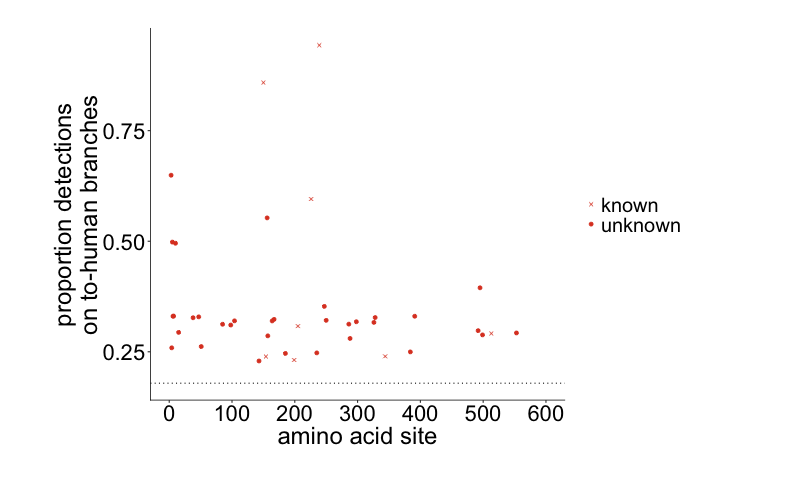

In [36]:
%%R -w 800 -h 500 -u px -i significant_muts,expected_prop_to_human,current_date,human_color,wild_color,domestic_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)

output_filename = paste("HA-aa-sig-mutations-scores-branches-test-to-human-",current_date,".pdf", sep="")

p <- ggplot(data=significant_muts, aes(y=prop_to_human, x=site, shape=known)) + 
    geom_point(color=human_color, fill=human_color, alpha=1)+
    geom_hline(aes(yintercept=expected_prop_to_human), linetype=3)+
    #geom_line(stat="count")+
    labs(y="\nproportion detections\non to-human branches", x="amino acid site\n")+
    scale_shape_manual(values=c(known=4, unknown=19))+
    #scale_y_continuous(breaks=seq(0,0.2,0.05), limits=c(0,0.2))+
    scale_x_continuous(breaks=seq(0,600,100), limits=c(0,600))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 12, height = 5, device = "pdf", path = "../figures", dpi = 300)
p

In [46]:
sig_df2['known'] = sig_df2['site'].apply(return_known_unknown, args=[annotations])
sig_df2['annotations'] = sig_df2['site'].apply(return_annotations, args=[annotations])

sig_df2.head()

,Unnamed: 0,aa_mut,domestic-to-wild,within-domestic,wild-to-domestic,within-wild,within-human,domestic-to-human,wild-to-human,total_counts,prop_to_human,prop_to_domestic,prop_to_wild,p_values_to_human,site,known,annotations
0,0,E340K,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,1.000000,1.000000e+00,340,known,[Presence of a polybasic cleavage site in H5/H...
1,1,T205K,4.0,792.0,231.0,6.0,0.0,0.0,0.0,1033.0,0.000000,0.990319,0.009681,3.197705e-74,205,known,[Introduction of Lys205Arg naturally occurring...
2,2,V328F,11.0,0.0,11.0,0.0,597.0,523.0,1.0,1143.0,0.979878,0.009624,0.009624,2.944779e-319,328,unknown,
3,3,T156A,926.0,111.0,79.0,108.0,0.0,0.0,0.0,1224.0,0.000000,0.155229,0.844771,7.105492e-88,156,unknown,
4,4,R473G,22.0,1088.0,30.0,0.0,0.0,0.0,0.0,1140.0,0.000000,0.980702,0.019298,5.140653e-82,473,unknown,


In [47]:
# make another column for a colorby 
x = sig_df2[(sig_df2['total_counts'] > number_trees*3)&(sig_df2['prop_to_human'] > expected_prop_to_human)&(sig_df2['p_values_to_human'] < 0.05/total_number_mutations)]
y = sig_df2[~((sig_df2['total_counts'] > number_trees*3)&(sig_df2['prop_to_human'] > expected_prop_to_human)&(sig_df2['p_values_to_human'] < 0.05/total_number_mutations))]
x['color'] = "sig"
y['color'] = "not"

print(len(x), len(y), len(sig_df2))

43 1309 1352


/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [48]:
sig_df3 = x.append(y)

/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)
/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)
/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Use suppressPackageStartupMessages() to eliminate package startup
messages.

  warnings.warn(x, RRuntimeWarning)


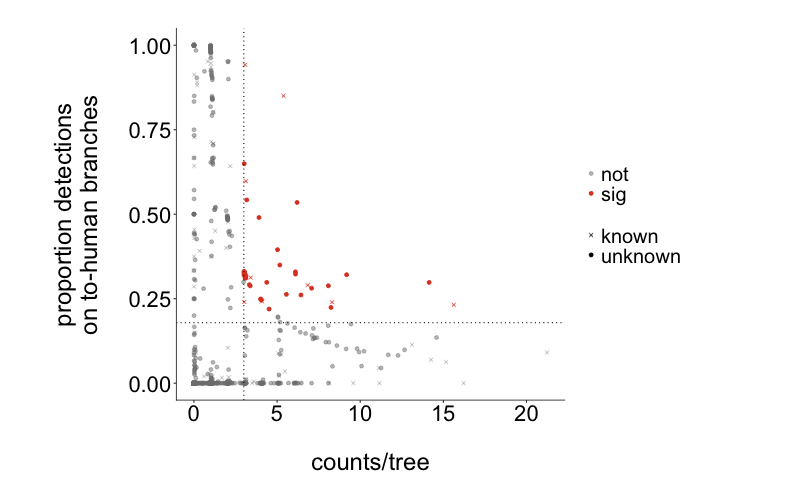

In [49]:
%%R -w 800 -h 500 -u px -i sig_df3,number_trees,expected_prop_to_human,current_date,human_color,wild_color,domestic_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)

#sig_df2 <- subset(sig_df2, total_counts >= number_trees*2,)
output_filename = paste("HA-aa-sig-mutations-scores-branches-test-to-human-vs-counts-",current_date,".pdf", sep="")

p <- ggplot(data=sig_df3, aes(y=prop_to_human, x=total_counts/number_trees, shape=known, color=color, fill=color, alpha=color), size=1) + 
    geom_point()+
    geom_hline(aes(yintercept=expected_prop_to_human), linetype=3)+
    geom_vline(aes(xintercept=3), linetype=3)+  # detected at least twice
    labs(y="\nproportion detections\non to-human branches\n", x="\ncounts/tree")+
    scale_color_manual(values=c(sig=human_color,not="grey50"))+
    scale_fill_manual(values=c(sig=human_color,not="grey50"))+
    scale_alpha_manual(values=c(sig=1,not=0.5))+

    #scale_y_continuous(breaks=seq(0,0.2,0.05), limits=c(0,0.2))+
    scale_shape_manual(values=c(known=4, unknown=19))+
    #scale_x_continuous(breaks=seq(0,600,100), limits=c(0,600))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 10, height = 5, device = "pdf", path = "../figures", dpi = 300)
p

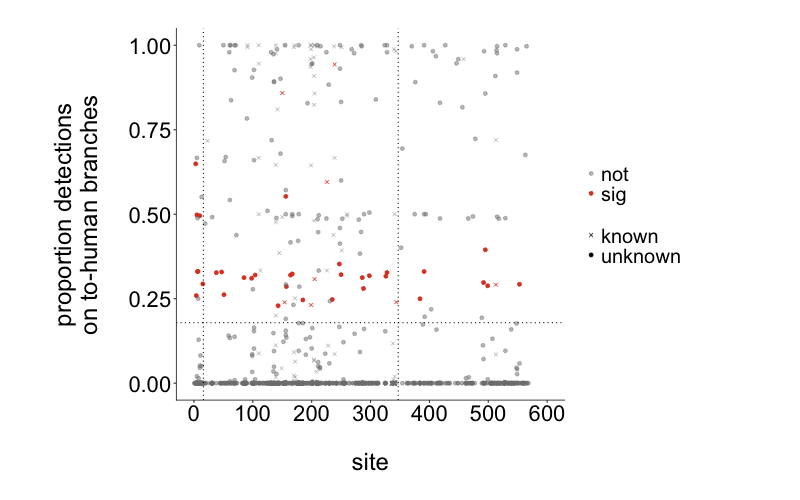

In [47]:
%%R -w 800 -h 500 -u px -i sig_df3,number_trees,expected_prop_to_human,total_number_mutations,current_date,human_color,wild_color,domestic_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)

# sig_df2 <- subset(sig_df2, total_counts >= number_trees*2,)
# sig_df2 <- subset(sig_df2, prop_to_human > expected_prop_to_human,)
# sig_df2 <- subset(sig_df2, p_values_to_human > 0.05/total_number_mutations,)

output_filename = paste("HA-aa-sig-mutations-scores-branches-test-to-human-vs-site-",current_date,".pdf", sep="")

p <- ggplot(data=sig_df3, aes(y=prop_to_human, x=site, shape=known, color=color, fill=color, alpha=color), size=1) + 
    geom_point()+
    geom_vline(aes(xintercept=16), linetype = 3)+  # end of signal peptide
    geom_vline(aes(xintercept=347), linetype=3)+   # end of HA1
    geom_hline(aes(yintercept=expected_prop_to_human), linetype=3)+

    labs(y="\nproportion detections\non to-human branches\n", x="\nsite")+
    scale_color_manual(values=c(sig=human_color,not="grey50"))+
    scale_fill_manual(values=c(sig=human_color,not="grey50"))+
    scale_alpha_manual(values=c(sig=1,not=0.5))+

    #scale_y_continuous(breaks=seq(0,0.2,0.05), limits=c(0,0.2))+
    scale_shape_manual(values=c(known=4, unknown=19))+
    scale_x_continuous(breaks=seq(0,600,100), limits=c(0,600))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 12, height = 5, device = "pdf", path = "../figures", dpi = 300)
p

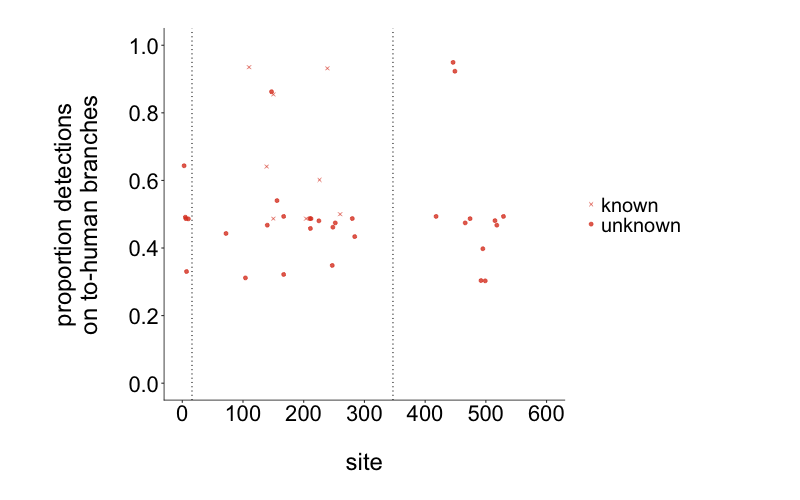

In [230]:
%%R -w 800 -h 500 -u px -i sig_df2,number_trees,expected_prop_to_human,total_number_mutations,current_date,human_color,wild_color,domestic_color # this sets the size of the plot...otherwise, it will go off the page

require(ggplot2)
library(ggplot2)
library(RColorBrewer)

sig_df2 <- subset(sig_df2, total_counts >= number_trees*2,)
sig_df2 <- subset(sig_df2, prop_to_human > expected_prop_to_human,)
sig_df2 <- subset(sig_df2, p_values_to_human < 0.05/total_number_mutations,)

output_filename = paste("HA-aa-sig-mutations-scores-branches-test-to-human-",current_date,".pdf", sep="")

p <- ggplot(data=sig_df2, aes(y=prop_to_human, x=site, shape=known)) + 
    geom_point(alpha=0.8, color=human_color, fill=human_color)+
    geom_vline(aes(xintercept=16), linetype = 3)+  # end of signal peptide
    geom_vline(aes(xintercept=347), linetype=3)+   # end of HA1
    labs(y="\nproportion detections\non to-human branches\n", x="\nsite")+
    scale_y_continuous(breaks=seq(0,1,0.2), limits=c(0,1))+
    scale_shape_manual(values=c(known=4, unknown=19))+
    scale_x_continuous(breaks=seq(0,600,100), limits=c(0,600))+
    theme(panel.grid.major=element_line(colour=NA,size=NA))+    
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(axis.title=element_text(size=24, vjust=5))+
    theme(axis.text.y=element_text(size=22, colour="black"))+
    theme(axis.text.x=element_text(size=22, colour="black", hjust=0.5))+
    theme(legend.text=element_text(size=20))+
    theme(legend.title=element_blank())+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(1,4,1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))
    ##theme(legend.position = c(legend_x, legend_y))

ggsave(output_filename, width = 12, height = 5, device = "pdf", path = "../figures", dpi = 300)
p

In [195]:
expected_prop_to_domestic

0.5931685324571123

In [229]:
print(len(sig_df2[(sig_df2['total_counts'] > number_trees*2)&(sig_df2['prop_to_human'] > expected_prop_to_human)&(sig_df2['p_values_to_human'] < 0.05/total_number_mutations)]))
sig_df2[(sig_df2['total_counts'] > number_trees*2)&(sig_df2['prop_to_human'] > expected_prop_to_human)&(sig_df2['p_values_to_human'] < 0.05/total_number_mutations)]

40


,Unnamed: 0,aa_mut,wild-to-domestic,within-domestic,domestic-to-human,within-wild,wild-to-human,domestic-to-wild,within-human,total_counts,prop_to_human,prop_to_domestic,prop_to_wild,p_values_to_human,site,known
14,14,K3N,2.0,38.0,46.0,0.0,1.0,0.0,28.0,115.0,0.643478,0.347826,0.000000,1.197438e-15,3,unknown
29,29,T247A,88.0,38.0,59.0,0.0,3.0,0.0,10.0,198.0,0.348485,0.636364,0.000000,7.061044e-06,247,unknown
32,32,N260K,2.0,36.0,21.0,0.0,0.0,0.0,17.0,76.0,0.500000,0.500000,0.000000,1.258018e-06,260,known
67,67,V226A,14.0,32.0,68.0,0.0,0.0,1.0,3.0,118.0,0.601695,0.389831,0.008475,7.751467e-14,226,known
91,91,L225S,1.0,38.0,37.0,0.0,0.0,1.0,0.0,77.0,0.480519,0.506494,0.012987,4.686446e-06,225,unknown
103,103,M495I,38.0,55.0,33.0,21.0,0.0,1.0,43.0,191.0,0.397906,0.486911,0.115183,2.918678e-08,495,unknown
120,120,I167V,1.0,0.0,38.0,7.0,0.0,31.0,0.0,77.0,0.493506,0.012987,0.493506,1.542804e-06,167,unknown
142,142,N492D,190.0,140.0,150.0,38.0,2.0,6.0,14.0,540.0,0.303704,0.611111,0.081481,1.870923e-08,492,unknown
166,166,R499K,67.0,114.0,88.0,24.0,2.0,7.0,5.0,307.0,0.302932,0.589577,0.100977,2.460302e-05,499,unknown
189,189,T529A,5.0,33.0,17.0,0.0,0.0,1.0,21.0,77.0,0.493506,0.493506,0.012987,1.542804e-06,529,unknown


In [292]:
# reorder the columns to make easier to look at 
cols = significant_muts.columns.tolist()
cols = cols[0:2] + cols[13:17] + cols[9:11] + cols[11:15] + cols[2:9]
x = significant_muts[cols]
x

,Unnamed: 0,aa_mut,p_values_to_human,site,known,annotations,total_counts,prop_to_human,prop_to_domestic,prop_to_wild,p_values_to_human,site,wild-to-domestic,within-domestic,domestic-to-wild,within-wild,domestic-to-human,wild-to-human,within-human
21,21,K3N,4.123998e-126,3,unknown,,1012.0,0.649209,0.345850,0.001976,4.123998e-126,3,22.0,328.0,2.0,0.0,426.0,3.0,231.0
29,29,D199N,6.798260e-15,199,known,[Introduction of Asp199Gly substitution in the...,5233.0,0.231416,0.738582,0.029429,6.798260e-15,199,860.0,3005.0,112.0,42.0,1150.0,3.0,61.0
40,40,T247A,1.502909e-41,247,unknown,,1721.0,0.352702,0.633934,0.002905,1.502909e-41,247,812.0,279.0,4.0,1.0,535.0,18.0,72.0
43,43,N260K,3.117927e-45,260,known,"[Introduction of Asn170Ser, Gln238Leu, Asn260A...",670.0,0.495522,0.498507,0.005970,3.117927e-45,260,11.0,323.0,4.0,0.0,201.0,0.0,131.0
81,81,E286G,8.588012e-17,286,unknown,,1040.0,0.312500,0.671154,0.013462,8.588012e-17,286,108.0,590.0,8.0,6.0,205.0,3.0,120.0
93,93,V226A,7.555803e-107,226,known,[Introduction of Val226Ile substitution in the...,1038.0,0.595376,0.374759,0.009634,7.555803e-107,226,101.0,288.0,10.0,0.0,610.0,21.0,8.0
108,108,K38R,2.819931e-19,38,unknown,,1003.0,0.327019,0.335992,0.333998,2.819931e-19,38,56.0,281.0,217.0,118.0,328.0,3.0,0.0
115,115,L6P,4.867141e-20,6,unknown,,1011.0,0.330366,0.636993,0.032641,4.867141e-20,6,74.0,570.0,33.0,0.0,202.0,0.0,132.0
123,123,L225S,1.150532e-43,225,unknown,,675.0,0.487407,0.496296,0.014815,1.150532e-43,225,14.0,321.0,10.0,0.0,329.0,1.0,0.0
138,138,M495I,2.117230e-58,495,unknown,,1677.0,0.394753,0.483005,0.121646,2.117230e-58,495,334.0,476.0,18.0,186.0,281.0,1.0,381.0


In [282]:
#print(annotations[147])
# print(annotations[172])
# print(annotations[205])
# print(annotations[139])

In [283]:
# are the scores for known mutations on average higher than the unknown ones? 
known_proportions = sig_df2[sig_df2['known'] == 'known']['prop_to_human'].mean()
unknown_proportions = sig_df2[sig_df2['known'] == 'unknown']['prop_to_human'].mean()

print(known_proportions, unknown_proportions)

0.14434239664805706 0.11380234819250451
